In [2]:
println( "Version Being Used:", VERSION )

Version Being used:0.6.2


In [3]:
#Package being used is a plotting module called Gadfly

#First we add the package
Pkg.add("Gadfly")

INFO: Cloning cache of Compose from https://github.com/GiovineItalia/Compose.jl.git
INFO: Cloning cache of CoupledFields from https://github.com/Mattriks/CoupledFields.jl.git
INFO: Cloning cache of DataArrays from https://github.com/JuliaStats/DataArrays.jl.git
INFO: Cloning cache of GZip from https://github.com/JuliaIO/GZip.jl.git
INFO: Cloning cache of Gadfly from https://github.com/GiovineItalia/Gadfly.jl.git
INFO: Cloning cache of Hexagons from https://github.com/GiovineItalia/Hexagons.jl.git
INFO: Cloning cache of Juno from https://github.com/JunoLab/Juno.jl.git
INFO: Cloning cache of Media from https://github.com/JunoLab/Media.jl.git
INFO: Installing Compose v0.5.4
INFO: Installing CoupledFields v0.0.1
INFO: Installing DataArrays v0.6.2
INFO: Downgrading DataFrames: v0.11.5 => v0.10.1
INFO: Installing GZip v0.3.0
INFO: Installing Gadfly v0.6.4
INFO: Installing Hexagons v0.1.0
INFO: Installing Juno v0.3.2
INFO: Installing Media v0.3.0
INFO: Downgrading RData: v0.3.0 => v0.2.0
INFO

In [4]:
#Loading the package
using Gadfly

INFO: Precompiling module Gadfly.


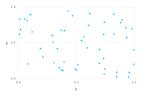

In [5]:
#Point geometry added by default
plot(x=rand(50), y=rand(50))

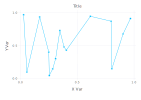

In [9]:
#Layering lines and points
plot(x=rand(15), y=rand(15), Geom.point, Geom.line, Guide.xlabel("X Var"), 
    Guide.ylabel("Y Var"), Guide.title("Title"))

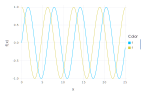

In [10]:
#Some functions can be plotted more easily versus other packages
plot([sin, cos], 0, 25)

In [12]:
#Using RDatasets for accessible data to demonstrate more advanced features
using RDatasets

INFO: Recompiling stale cache file /Users/abhimanyumukerji/.julia/lib/v0.6/RDatasets.ji for module RDatasets.


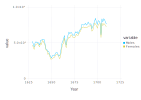

In [17]:
#Example from London Birth Rate Data
births = RDatasets.dataset("HistData", "Arbuthnot")[[:Year, :Males, :Females]]
stack(births, [:Males, :Females])
plot(stack(births, [:Males, :Females]), x=:Year, y=:value, color=:variable,
     Geom.line)

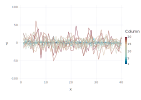

In [18]:
#Color indexing of columns
X = randn(40, 20) * diagm(1:20)
plot(X, x=Row.index, y=Col.value, color=Col.index, Geom.line)

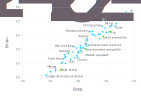

In [22]:
#From the Mammals Mass database 
mammals = dataset("MASS", "mammals")

#Demonstrating use of logarithmic scale
plot(mammals, x=:Body, y=:Brain, label=:Mammal,
         Geom.point, Geom.label, Scale.x_log10, Scale.y_log10)

INFO: Precompiling module RData.


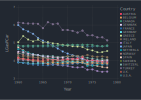

In [23]:
#There are interesting themes to explore
Gadfly.push_theme(:dark)

#Demonstrating using Gasoline dataset
gasoline = dataset("Ecdat", "Gasoline")

plot(gasoline, x=:Year, y=:LGasPCar, color=:Country,
         Geom.point, Geom.line)


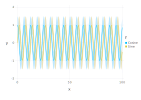

In [26]:
#Returning to default theme
Gadfly.push_theme(:default)

#Plotting in conjunction with dataframes

using DataFrames

xs = 0:0.5:100

df_cos = DataFrame(
    x=xs,
    y=cos.(xs),
    ymin=cos.(xs) .- 0.5,
    ymax=cos.(xs) .+ 0.5,
    f="Cosine"
)

df_sin = DataFrame(
    x=xs,
    y=sin.(xs),
    ymin=sin.(xs) .- 0.5,
    ymax=sin.(xs) .+ 0.5,
    f="Sine"
)

df = vcat(df_cos, df_sin)
p = plot(df, x=:x, y=:y, ymin=:ymin, ymax=:ymax, color=:f, Geom.line, Geom.ribbon)

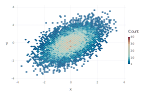

In [27]:
#Viewing distributions in 2-D, using color coding of frequency

using Distributions

X = rand(MultivariateNormal([0.0, 0.0], [1.0 0.5; 0.5 1.0]), 10000);
plot(x=X[1,:], y=X[2,:], Geom.hexbin(xbincount=100, ybincount=100))

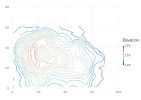

In [28]:
#Possible to create topographic plots not convenient in other languages, and control color key

volcano = float(convert(Array, dataset("datasets", "volcano")))
plot(z=volcano, Geom.contour, Guide.colorkey("Elevation"))

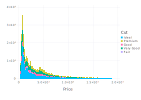

In [29]:
#Can create layered histograms
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.histogram)

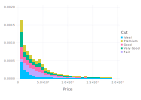

In [30]:
#Also stacked histograms and use density versus count
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut",
     Geom.histogram(bincount=30, density=true))

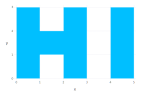

In [31]:
#Can create Polygon shapes
plot(x=[0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 4, 5, 5, 4],
     y=[0, 0, 1, 1, 0, 0, 3, 3, 2, 2, 3, 3, 0, 0, 3, 3],
     group=["H", "H", "H", "H", "H", "H", "H", "H",
            "H", "H", "H", "H", "I", "I", "I", "I"],
     Geom.polygon(preserve_order=true, fill=true))

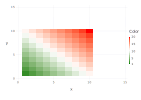

In [33]:
#Can generate continuous color scales for plots
x = repeat(collect(1:10), inner=[10])
y = repeat(collect(1:10), outer=[10])
plot(x=x, y=y, color=x+y, Geom.rectbin,
     Scale.color_continuous(colormap=Scale.lab_gradient("green", "white", "red")))

In [ ]:
#Much more functionality and details at: http://gadflyjl.org/stable/index.html